In [1]:
'''
@credits: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
'''
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)


In [4]:
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [7]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [8]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [9]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0402 - 2s/epoch - 24ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0197 - 205ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0143 - 209ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0130 - 282ms/epoch - 3ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0121 - 257ms/epoch - 3ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0113 - 251ms/epoch - 3ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0105 - 248ms/epoch - 3ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0095 - 225ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0086 - 210ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0076 - 178ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0067 - 189ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0057 - 223ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0048 - 243ms/epoch - 3ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0040 - 225ms/epoch - 2ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0033 - 248ms/epoch - 3ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0028 - 237ms/epoc

In [10]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [11]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [12]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 22.90 RMSE
Test Score: 51.88 RMSE


In [13]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [14]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

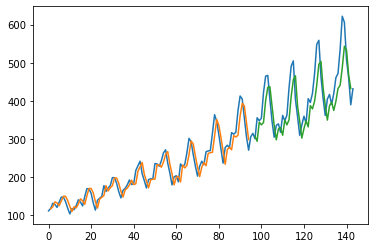

In [15]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
'''
LSTM for Regression with Time Steps
You may have noticed that the data preparation for the LSTM network includes
time steps.
Some sequence problems may have a varied number of time steps per sample.
For example, you may have measurements of a physical machine leading up to
a point of failure or a point of surge. Each incident would be a sample the
 observations that lead up to the event would be the time steps, and the
 variables observed would be the features.
Time steps provide another way to phrase our time series problem. Like
 above in the window example, we can take prior time steps in our time
 series as inputs to predict the output at the next time step.
Instead of phrasing the past observations as separate input features,
 we can use them as time steps of the one input feature, which is indeed a
 more accurate framing of the problem.
We can do this using the same data representation as in the previous
window-based example, except when we reshape the data, we set the columns
to be the time steps dimension and change the features dimension back to 1.
For example:

'''


In [16]:
# LSTM for international airline passengers problem with time step regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error



In [17]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [18]:
# fix random seed for reproducibility
numpy.random.seed(7)


In [19]:
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


In [20]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


In [21]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [22]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [23]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))


In [24]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
92/92 - 2s - loss: 0.0818 - 2s/epoch - 23ms/step
Epoch 2/100
92/92 - 0s - loss: 0.0411 - 225ms/epoch - 2ms/step
Epoch 3/100
92/92 - 0s - loss: 0.0288 - 240ms/epoch - 3ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0248 - 305ms/epoch - 3ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0229 - 261ms/epoch - 3ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0217 - 287ms/epoch - 3ms/step
Epoch 7/100
92/92 - 0s - loss: 0.0206 - 270ms/epoch - 3ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0195 - 318ms/epoch - 3ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0184 - 229ms/epoch - 2ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0172 - 247ms/epoch - 3ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0162 - 362ms/epoch - 4ms/step
Epoch 12/100
92/92 - 0s - loss: 0.0150 - 249ms/epoch - 3ms/step
Epoch 13/100
92/92 - 0s - loss: 0.0139 - 279ms/epoch - 3ms/step
Epoch 14/100
92/92 - 0s - loss: 0.0127 - 269ms/epoch - 3ms/step
Epoch 15/100
92/92 - 0s - loss: 0.0113 - 283ms/epoch - 3ms/step
Epoch 16/100
92/92 - 0s - loss: 0.0100 - 376ms/epoc

In [25]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [26]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [27]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 24.49 RMSE
Test Score: 61.03 RMSE


In [28]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


In [29]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


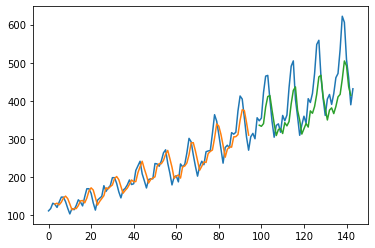

In [30]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()